In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\91907\OneDrive\Pictures\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.shape

(18249, 14)

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

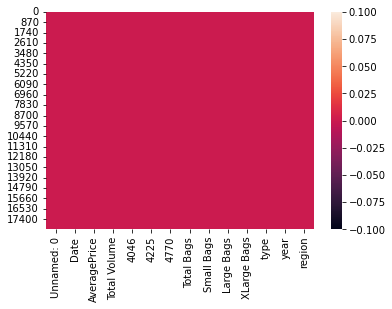

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

# So there is no null values are present in the dataset

In [7]:
df=df.drop(["Date"],axis=1)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
df=df.drop(["Unnamed: 0"],axis=1)

In [9]:
df=df.drop(["XLarge Bags"],axis=1)

In [10]:
df=df.drop(["type"],axis=1)

In [11]:
df.shape

(18249, 10)

# The Dataset can be seen in two angel one is AveragePrice and another one is region

# EDA

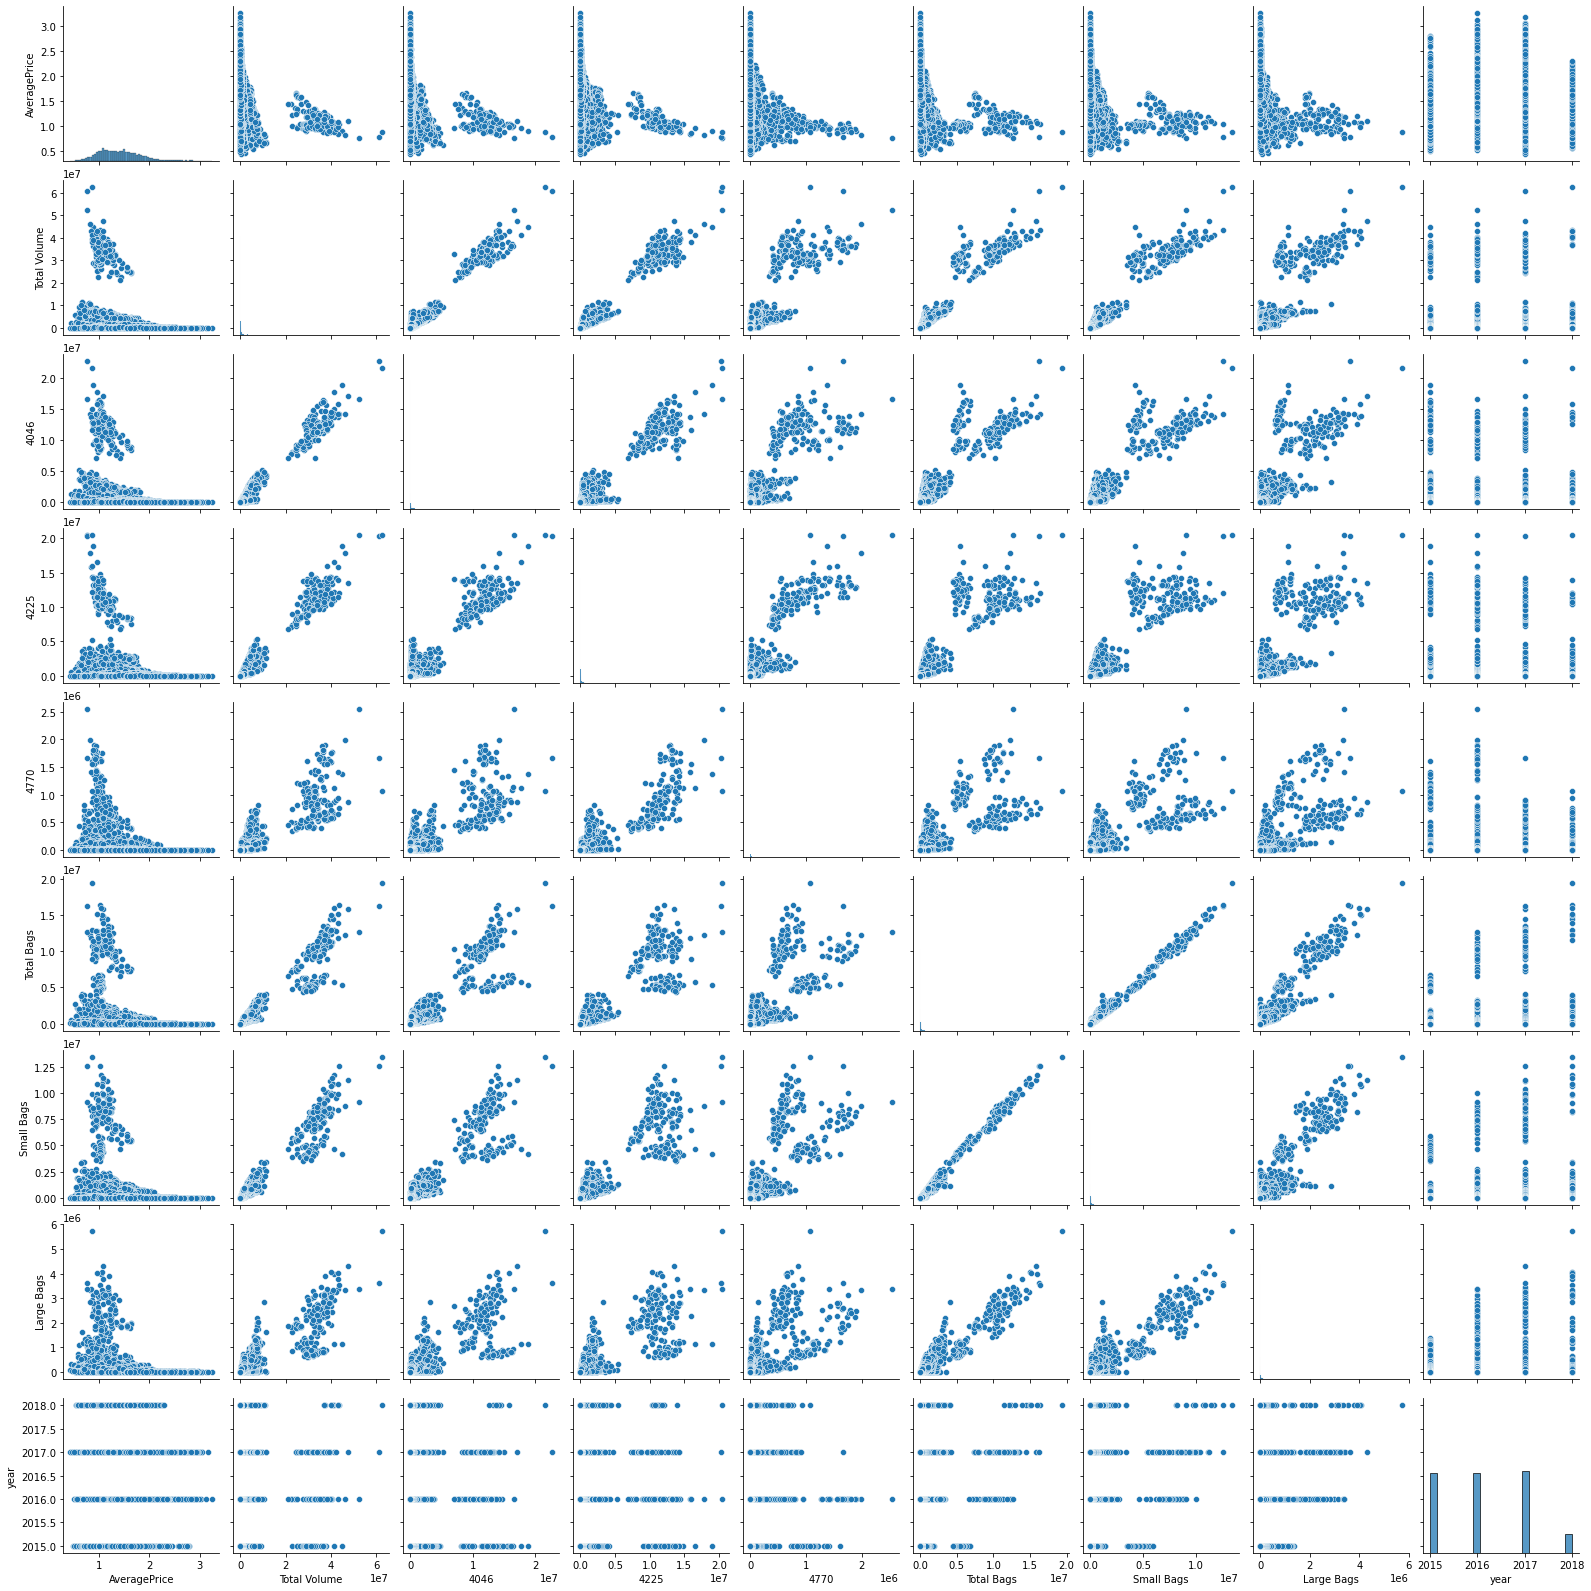

In [13]:
sns.pairplot(df)

# Checking the distribution of the continous value of the float type columns

In [14]:
df_visualization_continous=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','year']].copy()

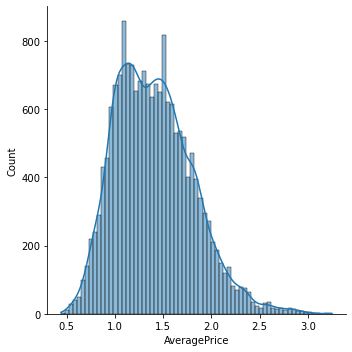

In [15]:
sns.displot(df_visualization_continous['AveragePrice'],kde=True)

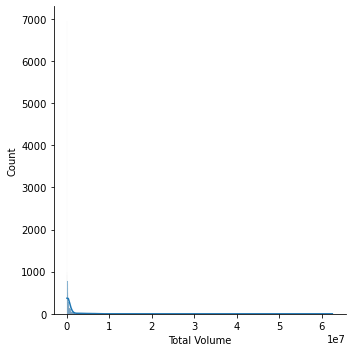

In [16]:
sns.displot(df_visualization_continous['Total Volume'],kde=True)

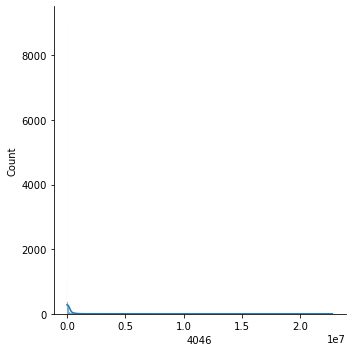

In [17]:
sns.displot(df_visualization_continous['4046'],kde=True)

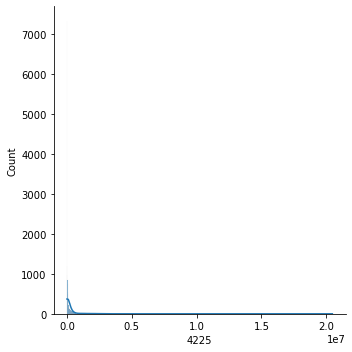

In [18]:
sns.displot(df_visualization_continous['4225'],kde=True)

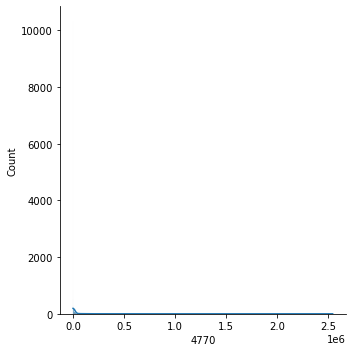

In [19]:
sns.displot(df_visualization_continous['4770'],kde=True)

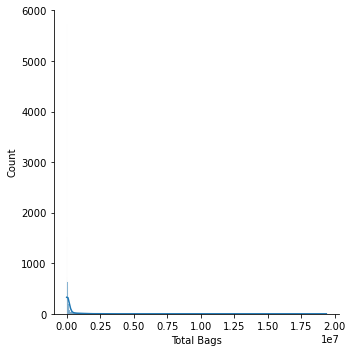

In [20]:
sns.displot(df_visualization_continous['Total Bags'],kde=True)

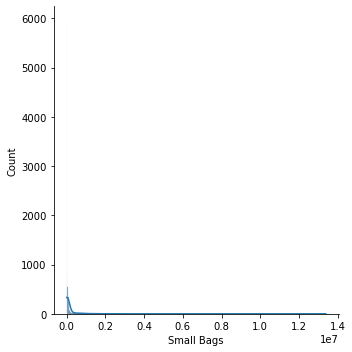

In [21]:
sns.displot(df_visualization_continous['Small Bags'],kde=True)

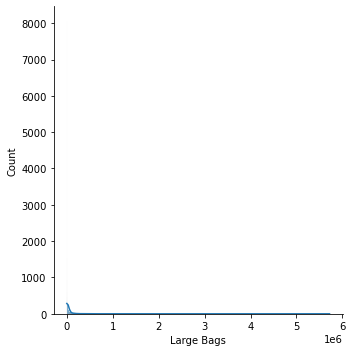

In [22]:
sns.displot(df_visualization_continous['Large Bags'],kde=True)

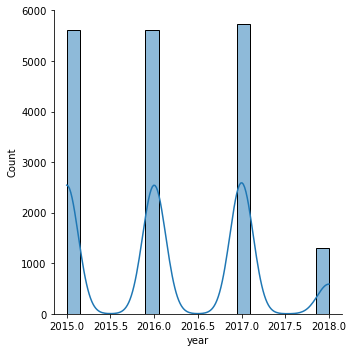

In [23]:
sns.displot(df_visualization_continous['year'],kde=True)

OBSERVTION:
We have seen AveragePrice and year two columns are normally distributed

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

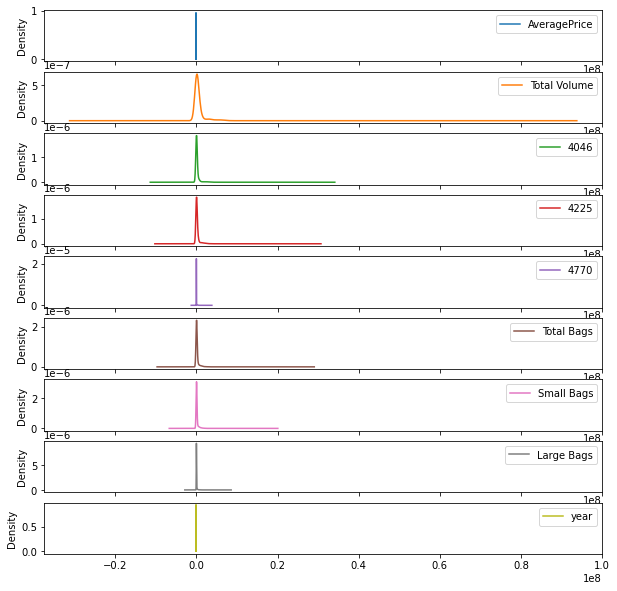

In [24]:
df.plot(kind='kde',subplots=True,figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

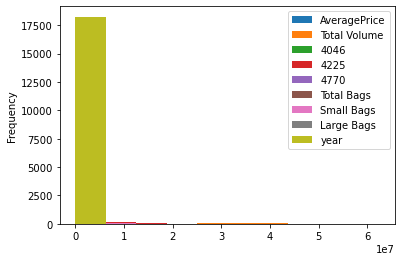

In [25]:
df.plot(kind="hist")

# CORRELATION

In [26]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.087891
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,1.000000


In [27]:
df.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

<AxesSubplot:>

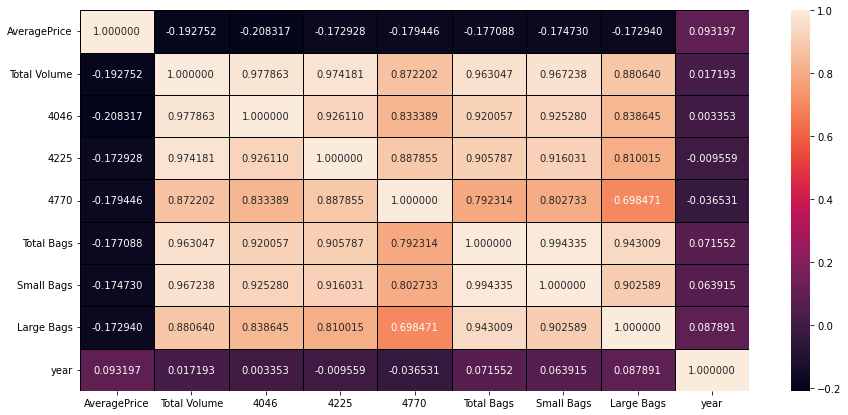

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

Total Volume,4046,4225,4770,TotalBags,SmallBags,LargeBags are waekly correlated

year is strongly correlated

# DESCRIBING DATASET

In [29]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,2018.000000


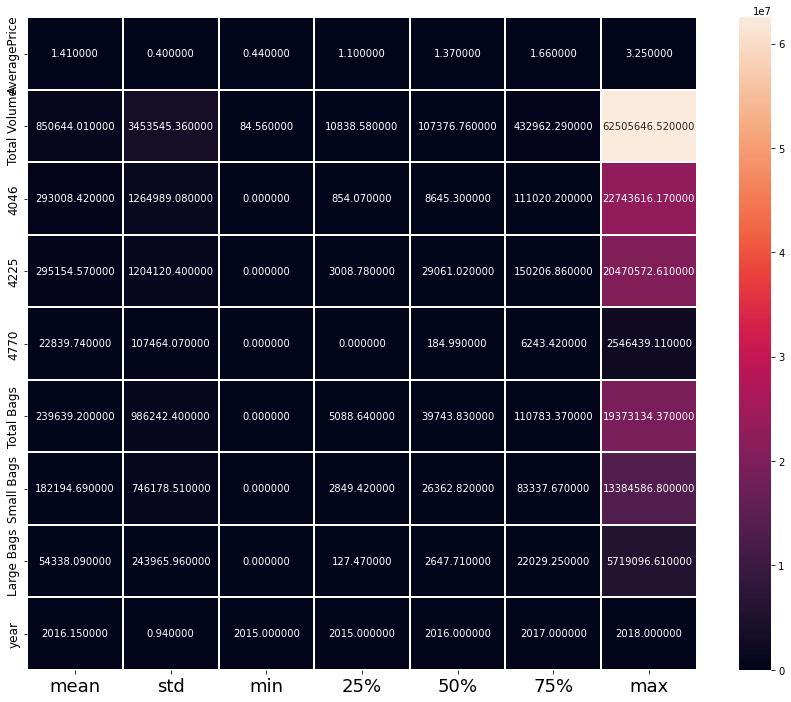

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

AveragePrice

mean:1

median:1.3

min:0

Max: 3.25

TotalVolume

mean:8.50

median:1.07

min:8.445

Max: 6.25

4046

mean:2.95

median:8.65

min:0

Max: 2.27

4225

mean:2.28

median:2.9

min:0

Max: 2.04

TotalBags

mean:2.39

median:1.3

min:0

Max: 3.97

SmallBags

mean:5.43

median:2.63

min:0

Max: 1.33

# SO LET'S TARGET THE region COLUMN FIRST

# CLASSIFICATION ALGORITHAM

In [31]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [32]:
df["region"]=Le.fit_transform(df["region"])

In [33]:
Le.inverse_transform([0,1])

array(['Albany', 'Atlanta'], dtype=object)

In [34]:
df["region"].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [12]:
x=df.drop("region",axis=1)
y=df["region"]#target column

In [13]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2015
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2018


In [38]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [39]:
x.shape

(18249, 9)

In [40]:
x.skew().sort_values(ascending=False)

4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
year             0.215339
dtype: float64

we can see skewness in most of the column of our dataset,we will remove the skewness using power transform function

In [41]:
from sklearn.preprocessing import power_transform

In [42]:
x_new=power_transform(x)

In [43]:
type(x_new)

numpy.ndarray

In [44]:
x.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'year'],
      dtype='object')

# VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
x=df.iloc[:,0:-1]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2015
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2018


In [47]:
x.shape

(18249, 9)

In [48]:
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [49]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [50]:
calc_vif()

      variables    VIF FACTOR
0  AveragePrice  1.391335e+01
1  Total Volume  5.204945e+09
2          4046  6.937023e+08
3          4225  6.323877e+08
4          4770  4.966241e+06
5    Total Bags  4.236683e+08
6    Small Bags  6.857359e+03
7    Large Bags  6.785081e+02
8          year  1.424016e+01


so here no multicollinarity is present in the data set...........no high value is there

# Skewness

In [51]:
sk=x.skew()
sk

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
year             0.215339
dtype: float64

In [52]:
sk[np.abs(sk)>0.5].all()

True

In [53]:
sk[np.abs(sk)>0.5].all()

True

In [54]:
x.skew()[np.abs(x.skew())<0.25].all()

True

In [55]:
x=power_transform(x,method='yeo-johnson')

In [56]:
x.skew()[np.abs(x.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

# skewness has been removed

# checking outlayers

Box plot

<AxesSubplot:>

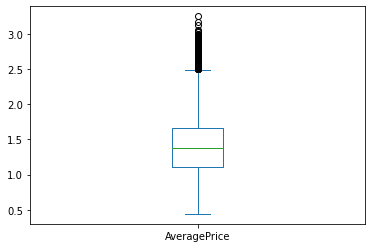

In [14]:
df['AveragePrice'].plot.box()

<AxesSubplot:>

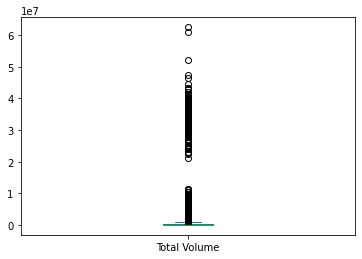

In [15]:
df['Total Volume'].plot.box()

<AxesSubplot:>

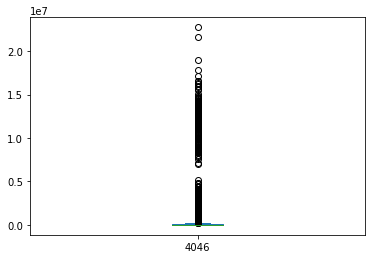

In [16]:
df['4046'].plot.box()

<AxesSubplot:>

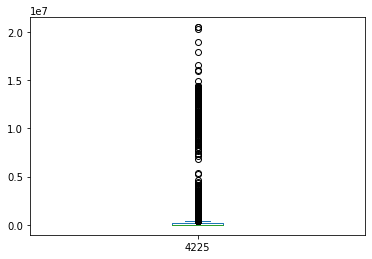

In [17]:
df['4225'].plot.box()

<AxesSubplot:>

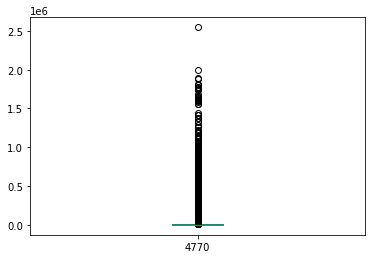

In [18]:
df['4770'].plot.box()

<AxesSubplot:>

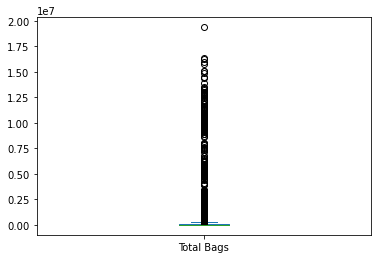

In [19]:
df['Total Bags'].plot.box()

<AxesSubplot:>

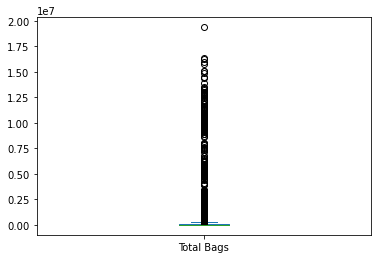

In [20]:
df['Total Bags'].plot.box()

<AxesSubplot:>

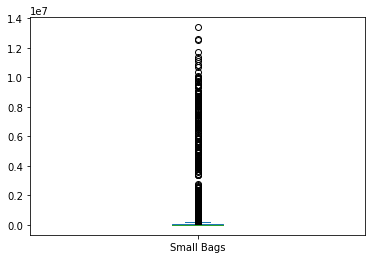

In [21]:
df['Small Bags'].plot.box()

<AxesSubplot:>

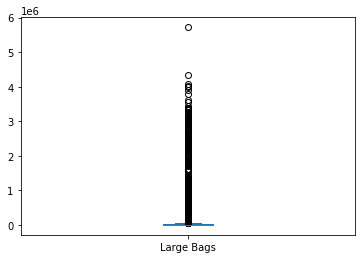

In [22]:
df['Large Bags'].plot.box()

here some outlayers are present

In [23]:
from scipy.stats import zscore

In [24]:
(np.abs(zscore(x))<3).all()

AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
year             True
dtype: bool

In [25]:
z=np.abs(zscore(x))
z.shape

(18249, 9)

In [26]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [27]:
len(np.where(z>3)[0])

1539

In [28]:
x_new_z=df[(z<3).all(axis=1)]
x_new_z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2018,WestTexNewMexico


In [29]:
x_new_z.shape

(17736, 10)

In [30]:
x.shape

(18249, 9)

# DATA LOSS PERCENTAGE

In [31]:
(18249-18141)/18249*100

0.5918132500410981

0.59 % DATA HAS BEEN REMOVED

# Let's training the Dataset

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 13 The model is performing very wel
Traning accuracy score is= 13
Testing accuracy score is= 13
randam state= 22 The model is performing very wel
Traning accuracy score is= 22
Testing accuracy score is= 22
randam state= 44 The model is performing very wel
Traning accuracy score is= 44
Testing accuracy score is= 44
randam state= 80 The model is performing very wel
Traning accuracy score is= 80
Testing accuracy score is= 80
randam state= 85 The model is performing very wel
Traning accuracy score is= 85
Testing accuracy score is= 85
randam state= 89 The model is performing very wel
Traning accuracy score is= 89
Testing accuracy score is= 89
randam state= 93 The model is performing very wel
Traning accuracy score is= 93
Testing accuracy score is= 93
randam state= 170 The model is performing very wel
Traning accuracy score is= 170
Testing accuracy score is= 170
randam state= 178 The model is performing very wel
Traning accuracy score is= 178
Testing accuracy score is= 178
rand

In [37]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))

                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00        61
            Atlanta       0.00      0.00      0.00        67
BaltimoreWashington       0.28      0.14      0.18        58
              Boise       0.00      0.00      0.00        78
             Boston       0.18      0.14      0.16        70
   BuffaloRochester       0.00      0.00      0.00        86
         California       0.13      0.33      0.19        76
          Charlotte       0.00      0.00      0.00        64
            Chicago       0.62      0.66      0.64        68
   CincinnatiDayton       0.03      0.01      0.02        86
           Columbus       0.00      0.00      0.00        67
      DallasFtWorth       0.17      0.10      0.13        69
             Denver       0.07      0.40      0.12        67
            Detroit       0.13      0.19      0.16        73
        GrandRapids       0.00      0.00      0.00        74
         GreatLakes    

In [38]:
print(confusion_matrix(y_test,pred_test))

[[ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  3  7  3]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ... 10 35  0]
 [ 0  0  2 ...  4  5  2]]


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 78.35616438356165
[[39  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 47 ...  0  0  1]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  2 ...  0  0 49]]
                     precision    recall  f1-score   support

             Albany       0.76      0.64      0.70        61
            Atlanta       0.68      0.72      0.70        67
BaltimoreWashington       0.82      0.81      0.82        58
              Boise       0.85      0.77      0.81        78
             Boston       0.84      0.89      0.86        70
   BuffaloRochester       0.76      0.74      0.75        86
         California       0.90      0.95      0.92        76
          Charlotte       0.84      0.73      0.78        64
            Chicago       0.92      0.87      0.89        68
   CincinnatiDayton       0.92      0.80      0.86        86
           Columbus       0.68      0.72      0.70        67
      DallasFtWorth       0.82      0.91      0.86        69
             Denver    

# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 89.94520547945206
[[50  0  0 ...  0  0  0]
 [ 0 62  0 ...  0  0  0]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 65  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  1 ...  0  0 60]]
                     precision    recall  f1-score   support

             Albany       0.81      0.82      0.81        61
            Atlanta       0.79      0.93      0.86        67
BaltimoreWashington       0.95      0.98      0.97        58
              Boise       0.89      0.86      0.88        78
             Boston       0.96      0.93      0.94        70
   BuffaloRochester       0.91      0.83      0.87        86
         California       0.96      1.00      0.98        76
          Charlotte       0.84      0.91      0.87        64
            Chicago       0.97      0.91      0.94        68
   CincinnatiDayton       0.93      0.86      0.89        86
           Columbus       0.79      0.93      0.86        67
      DallasFtWorth       0.93      1.00      0.97        69
             Denver    

# SVC

In [43]:
from sklearn.svm import SVC

In [44]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 15.890410958904111
[[ 0  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  5]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  2 ... 53  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  1 ...  0  0 19]]
                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00        61
            Atlanta       0.26      0.15      0.19        67
BaltimoreWashington       0.18      0.45      0.25        58
              Boise       0.00      0.00      0.00        78
             Boston       0.32      0.14      0.20        70
   BuffaloRochester       0.00      0.00      0.00        86
         California       0.77      0.32      0.45        76
          Charlotte       0.00      0.00      0.00        64
            Chicago       0.00      0.00      0.00        68
   CincinnatiDayton       0.00      0.00      0.00        86
           Columbus       0.00      0.00      0.00        67
      DallasFtWorth       0.32      0.14      0.20        69
             Denver   

# Let's check cv ...and see model is overfitted or not

In [45]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [46]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())

CV score for Random Forest Model: 0.659367452895708


# SVC

In [47]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 0.1794530759037004


# Logistic

In [48]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 0.11150719469023225


# Model is overfitted

Cv for RandomForestClassifier

In [49]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.11150719469023225 
The accuracy score is:- [0.60931507 0.80493151 0.76164384 0.66493151 0.45601535]


CV for SVC

In [50]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.1794530759037004 
The accuracy score is:- [0.60931507 0.80493151 0.76164384 0.66493151 0.45601535]


CV for LR

In [51]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 0.11150719469023225 
The accuracy score is:- [0.14356164 0.21232877 0.1539726  0.04136986 0.0063031 ]


# HYPERMETER TUNNING

In [52]:
RandomForestClassifier()

RandomForestClassifier()

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [55]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [56]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [57]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [58]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7747945205479452

# AUC ROC CURVE

In [61]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.show()

ValueError: multiclass format is not supported

# MODEL SAVING

In [ ]:
# import pickle
filename="Avocado1.pkl"
pickle.dump(lr,open(filename,'wb'))

In [63]:
loaded_model=pickle.load(open('Avocado1.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [64]:
results

0.13315068493150686

# conclusion

In [65]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Orginal'])

In [66]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,Denver,Midsouth,Denver,TotalUS,GreatLakes,Northeast,West,LosAngeles,LosAngeles,Midsouth,...,Detroit,California,SouthCentral,BaltimoreWashington,GreatLakes,SouthCentral,Northeast,Denver,GreatLakes,TotalUS
Orginal,Denver,Midsouth,Denver,TotalUS,GreatLakes,Northeast,West,LosAngeles,LosAngeles,Midsouth,...,Detroit,California,SouthCentral,BaltimoreWashington,GreatLakes,SouthCentral,Northeast,Denver,GreatLakes,TotalUS


# Let's target Avarage price.....Classification model

# Separating the columns into feature and target

In [67]:
features=df.drop("AveragePrice",axis=1)
target=df["AveragePrice"]

In [71]:
features=df.drop("region",axis=1)

In [79]:
features.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'year'],
      dtype='object')

In [80]:
target

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# VIF2

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=features.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    print(vif)

In [86]:
calc_vif()

      variables    VIF FACTOR
0  AveragePrice  1.391335e+01
1  Total Volume  5.204945e+09
2          4046  6.937023e+08
3          4225  6.323877e+08
4          4770  4.966241e+06
5    Total Bags  4.236683e+08
6    Small Bags  6.857359e+03
7    Large Bags  6.785081e+02
8          year  1.424016e+01


all values are same so multicoliniarity is not present

# Sacling the data using MIN MAX Scaler:

In [72]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 1.0
At random state0,the testing accuracy is :- 1.0


At random state1,the training accuracy is :- 1.0
At random state1,the testing accuracy is :- 1.0


At random state2,the training accuracy is :- 1.0
At random state2,the testing accuracy is :- 1.0


At random state3,the training accuracy is :- 1.0
At random state3,the testing accuracy is :- 1.0


At random state4,the training accuracy is :- 1.0
At random state4,the testing accuracy is :- 1.0


At random state5,the training accuracy is :- 1.0
At random state5,the testing accuracy is :- 1.0


At random state6,the training accuracy is :- 1.0
At random state6,the testing accuracy is :- 1.0


At random state7,the training accuracy is :- 1.0
At random state7,the testing accuracy is :- 1.0


At random state8,the training accuracy is :- 1.0
At random state8,the testing accuracy is :- 1.0


At random state9,the training accuracy is :- 1.0
At random state9,the testing accuracy is :- 1.0


At random 

At random state81,the testing accuracy is :- 1.0


At random state82,the training accuracy is :- 1.0
At random state82,the testing accuracy is :- 1.0


At random state83,the training accuracy is :- 1.0
At random state83,the testing accuracy is :- 1.0


At random state84,the training accuracy is :- 1.0
At random state84,the testing accuracy is :- 1.0


At random state85,the training accuracy is :- 1.0
At random state85,the testing accuracy is :- 1.0


At random state86,the training accuracy is :- 1.0
At random state86,the testing accuracy is :- 1.0


At random state87,the training accuracy is :- 1.0
At random state87,the testing accuracy is :- 1.0


At random state88,the training accuracy is :- 1.0
At random state88,the testing accuracy is :- 1.0


At random state89,the training accuracy is :- 1.0
At random state89,the testing accuracy is :- 1.0


At random state90,the training accuracy is :- 1.0
At random state90,the testing accuracy is :- 1.0


At random state91,the training accuracy 

In [75]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [76]:
lr.fit(features_train,target_train)

LinearRegression()

In [77]:
pred_test=lr.predict(features_test)

In [78]:
print(r2_score(target_test,pred_test))

1.0


# CV of the model

In [87]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cross score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing{Test_accuracy}")
    print("\n")

at cross fold2 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold3 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold4 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold5 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold6 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold7 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold8 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy score for testing1.0


at cross fold9 the cross score is 1.0 and accuracy score for training is -1.024880426683946 and accuracy

# Hyperparameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [89]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [90]:
ls=Lasso()
clif=GridSearchCV(ls,parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [91]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.04989600217930623

In [93]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

-1.1327431658448892

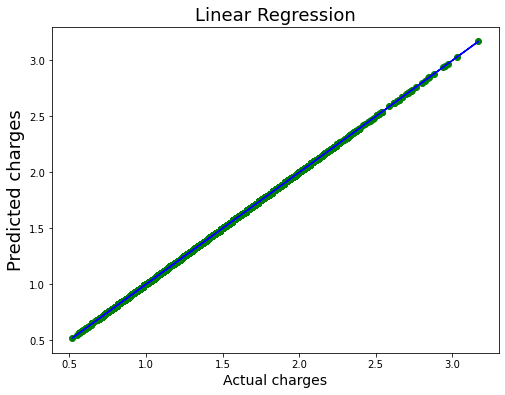

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Esamble technique

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
parameters={'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]}
rf=RandomForestRegressor
clf=GridSearchCV(estimator, parameters, n_jobs=-1, cv=5)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}


In [96]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print("R2 score:",rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross_val_score:",rfc*100)

R2 score: 99.99875641348613
Cross_val_score: 99.99588637989201


# Here we have seen model is performing 99.95% well

# MODEL SAVING 2

In [99]:
import pickle
filename='AVOCADO2.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [102]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])

In [103]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,Southeast,Northeast,Midsouth,Chicago,Denver,Denver,GreatLakes,Southeast,Plains,SanFrancisco,...,West,California,Denver,Seattle,Seattle,Northeast,Seattle,SouthCentral,Seattle,Seattle
Orginal,1.46,1.22,2.04,1.11,1.35,0.7,1.68,1.08,1.0,1.76,...,1.0,0.99,1.19,1.66,1.9,1.34,1.55,1.04,2.3901,0.71
